In [1]:
import os

In [2]:
path = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'

In [3]:
print(os.listdir(path))

['cats', 'dogs', 'horses', 'humans']


In [4]:
for i in os.listdir(path):
    print(i, len(os.listdir(path + i)))

cats 181
dogs 181
horses 181
humans 181


In [5]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [6]:
img = image.load_img(path + 'dogs/dog.1.jpg')

In [7]:
img = image.img_to_array(img)

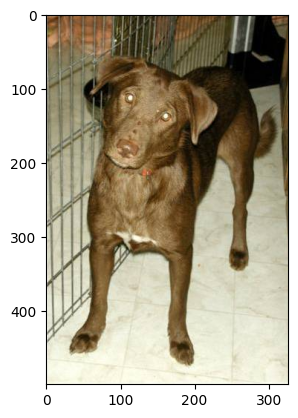

In [8]:
plt.imshow(img/255)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_X = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip=True
)

In [11]:
train_gen = train_X.flow_from_directory(path,
                                        target_size = (250, 250),
                                        batch_size = 20,
                                        class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [12]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [13]:
resnet_model = ResNet50(weights = 'imagenet', include_top = False)

In [14]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, None, None, 64)       16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, None, None, 64)       256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, None, None, 64)       0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, None, None, 512)      66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, None, None, 512)      2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, None, None, 512)      0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, None, None, 256)      590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, None, None, 1024)     525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, None, None, 1024)     0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, None, None, 256)      262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, None, None, 1024)     4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, None, None, 1024)     0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, None, None, 1024)     0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, None, None, 512)      2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, None, None, 512)      2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [15]:
for layer in resnet_model.layers:
    layer.trainable = True

In [16]:
model_output = resnet_model.output
model_output = GlobalAveragePooling2D()(model_output)
model_output = Dense(1024, activation = 'relu')(model_output)
model_output = Dense(4, activation = 'softmax')(model_output)

In [17]:
model = Model(inputs = resnet_model.input, outputs = model_output)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, None, None, 64)       16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, None, None, 64)       256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, None, None, 64)       0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, None, None, 512)      66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, None, None, 512)      2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, None, None, 512)      0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, None, None, 256)      590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, None, None, 1024)     525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, None, None, 1024)     0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, None, None, 256)      262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, None, None, 1024)     4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, None, None, 1024)     0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, None, None, 1024)     0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, None, None, 512)      2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, None, None, 512)      2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [19]:
adam = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [20]:
hist = model.fit(train_gen, epochs = 30)

Epoch 1/30
37/37 [==============================] - 390s 10s/step - loss: 5.1224 - accuracy: 0.3204 - precision: 0.3229 - recall: 0.0856
Epoch 2/30
37/37 [==============================] - 387s 10s/step - loss: 1.3254 - accuracy: 0.3978 - precision: 0.5234 - recall: 0.0773
Epoch 3/30
37/37 [==============================] - 369s 10s/step - loss: 1.2782 - accuracy: 0.3909 - precision: 0.5000 - recall: 0.0732
Epoch 4/30
37/37 [==============================] - 351s 9s/step - loss: 1.2653 - accuracy: 0.4033 - precision: 0.5088 - recall: 0.0801
Epoch 5/30
37/37 [==============================] - 351s 9s/step - loss: 1.2402 - accuracy: 0.4116 - precision: 0.5301 - recall: 0.0608
Epoch 6/30
37/37 [==============================] - 364s 10s/step - loss: 1.2626 - accuracy: 0.4047 - precision: 0.4623 - recall: 0.0677
Epoch 7/30
37/37 [==============================] - 371s 10s/step - loss: 1.2320 - accuracy: 0.4075 - precision: 0.5488 - recall: 0.0622
Epoch 8/30
37/37 [=========================